# IMPORTING LIBRARIES

In [313]:
import warnings,logging
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [314]:
! pip install transformers -q

In [315]:
from transformers import pipeline
import numpy as np
import pandas as pd
from PIL import Image

In [316]:
caption = pipeline('image-to-text')

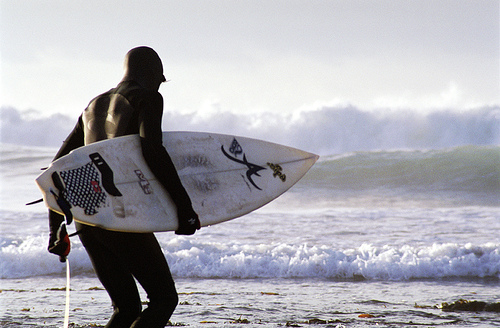

In [317]:
from IPython.display import Image

image_path = r"C:\DATASETS\flikr_images\img\72964268_d532bb8ec7.jpg"
Image(filename=image_path)

In [318]:
cap = caption(image_path)   
cap

[{'generated_text': 'a man walking on the beach carrying a surfboard '}]

# MODEL TRAINING


In [319]:
from sklearn.linear_model import LinearRegression     
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error       
from sklearn.feature_extraction.text import TfidfVectorizer



In [320]:
import pandas as pd
data_raw2 = pd.read_csv(r"C:\DATASETS\Instagram data.csv", encoding='latin1')
print(data_raw2)


     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follo

In [321]:
data_raw2

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [322]:
import pandas as pd

columns_to_keep = ['Saves', 'Shares', 'Likes', 'Caption', 'From Hashtags', 'From Explore', 'Hashtags']

data_raw2 = data_raw2[columns_to_keep]
data_raw2


,Saves,Shares,Likes,Caption,From Hashtags,From Explore,Hashtags
0,98,5,162,Here are some of the most important data visua...,1028,619,#finance #money #business #investing #investme...
1,194,14,224,Here are some of the best data science project...,1838,1174,#healthcare #health #covid #data #datascience ...
2,41,1,131,Learn how to train a machine learning model an...,1188,0,#data #datascience #dataanalysis #dataanalytic...
3,172,7,213,Heres how you can write a Python program to d...,621,932,#python #pythonprogramming #pythonprojects #py...
4,96,4,123,Plotting annotations while visualizing your da...,255,279,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...
114,573,38,373,Here are some of the best data science certifi...,3041,5352,#datascience #datasciencejobs #datasciencetrai...
115,135,1,148,Clustering is a machine learning technique use...,1368,2266,#machinelearning #machinelearningalgorithms #d...
116,36,1,92,Clustering music genres is a task of grouping ...,1538,1367,#machinelearning #machinelearningalgorithms #d...
117,1095,75,549,Here are some of the best data science certifi...,3147,17414,#datascience #datasciencejobs #datasciencetrai...


In [323]:
len(data_raw2.isnull())

119

In [324]:
data_raw2.dropna(inplace=True)

X = data_raw2.loc[:,['Caption']] 
Y = data_raw2.Likes              

null_indices = X.index.difference(X.index)
X = X.dropna()
Y = Y.drop(null_indices)
num_null_values = X.isnull().sum()
print(num_null_values)

Caption    0
dtype: int64


# PREDICTIONS

In [325]:
captions=data_raw2['Caption']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(captions)
model = LinearRegression()
model.fit(X, data_raw2['Likes'])

LinearRegression()

In [326]:
l = model.predict(X)

In [327]:
ab = cap[0]['generated_text']  # Assuming this retrieves a single generated text
ab_list = [ab]  # Convert the single text instance to a list
cap_transformed = vectorizer.transform(ab_list)  # Transform the list of text instances
print(cap_transformed)

  (0, 463)	0.4349811910208341
  (0, 311)	0.9004395390352962


In [328]:
a=model.predict(cap_transformed)
print("PREDICTED LIKE COUNT IS: ", int(a.round()))

PREDICTED LIKE COUNT IS:  117


In [329]:
y=data_raw2['Shares']
model2=LinearRegression()
model2.fit(X,data_raw2['Shares'])

a1 = model2.predict(X)
print("PREDICTED SHARE COUNT IS: ", a1.round())


PREDICTED SHARE COUNT IS:  [ 5.  8.  1.  7.  4. 10.  1.  9.  8.  3.  3. 14. 11.  5. 10. 11. 18.  1.
  6. 20.  5.  4.  9. 14.  3.  5.  6.  4.  3.  4.  3. 15.  4.  3.  8.  0.
  3. 11.  1.  3. 20. 13.  4.  2.  5. 19. 10.  3. 15. 35.  1. 16.  1.  8.
 15.  9.  2.  7. 16. 15.  6.  8.  1. -0. 12.  5. -0. 15.  2.  3.  7. -0.
 15.  6.  8.  0.  4. 11.  2.  6. 12. 24. 11. 18.  1.  6. 20. 10.  3. 15.
 35.  1. 14.  3.  5.  6.  4.  3.  4. 24. 13.  7.  2. 12. 15.  8.  3.  4.
 35. 23.  8.  4. 13. 17. 56.  1.  1. 56. 26.]


In [330]:
cap2=vectorizer.transform([cap[0]['generated_text']])

In [331]:
print("EXPECTED SHARES ARE: ", int(model2.predict(cap2)))

EXPECTED SHARES ARE:  0


In [332]:
model3=LinearRegression()
model3.fit(X,data_raw2['Saves'])
model3.predict(cap2)

array([46.23199392])

In [333]:
print("EXPECTED SAVES ARE: ", int(model3.predict(cap2)))

EXPECTED SAVES ARE:  46


In [334]:
data_raw2['Caption'] = l

In [335]:
l

array([161.99982251, 243.00004841, 130.99995162, 213.0001255 ,
       123.00002899, 143.99984313,  75.99978642, 124.00003973,
       159.00033327, 190.99994521,  80.99996273, 151.00035649,
       161.99995117, 142.00021563, 293.99979562, 159.00027079,
       205.0000403 , 120.99975931, 150.99985381,  72.00004293,
        75.99998648,  91.00032787, 194.999931  , 128.99982328,
       160.00005728, 174.99987384, 146.99972323, 114.00019895,
       151.00012719,  92.00013964, 213.99983797, 150.00031361,
       122.00004415, 151.99990014, 196.00032053,  85.9999726 ,
        84.99954114, 156.00037013,  71.99999595,  81.99987655,
       415.99995358, 179.99984246, 149.9999319 , 136.00009522,
       167.00025384, 225.00003673, 136.99962803, 114.00000556,
       263.00010116, 301.66665531, 125.99997094, 236.00009543,
        99.00030206, 212.0002714 , 299.00007221, 142.00011268,
       186.49991192, 112.99992154, 148.99997751, 135.00006572,
       118.49998279, 243.00004841, 178.00000601, 106.99

# OUTPUT

In [336]:
def pred(img_path):
    cap=caption(image_path)
    print(cap)
    cap2=vectorizer.fit_transform([cap[0]['generated_text']])
    likes=model.predict(cap2)
    shares=model2.predict(cap2)
    saves=model3.predict(cap2)

    print("THE CAPTION GENERATED IS: ", cap)
    print("PREDICTED LIKE COUNT IS: ", int(a.round()))
    print("PREDICTED SHARE COUNT IS: ", a1.round())
    print("EXPECTED SAVES ARE: ", int(model3.predict(cap2)))

In [337]:
caption(image_path)

[{'generated_text': 'a man walking on the beach carrying a surfboard '}]

In [338]:
r=cap[0]['generated_text']
print("THE CAPTION GENERATED IS: ", r)
print("PREDICTED LIKE COUNT IS: ", int(a.round()))
print("PREDICTED SHARE COUNT IS: ", int(model2.predict(cap2)))
print("EXPECTED SAVES ARE: ", int(model3.predict(cap2)))
df={'caption':[r],'Likes':int(a.round()),'Share':int(model2.predict(cap2)),'Shares':int(model3.predict(cap2))}
df=pd.DataFrame(df)
df

THE CAPTION GENERATED IS:  a man walking on the beach carrying a surfboard 
PREDICTED LIKE COUNT IS:  117
PREDICTED SHARE COUNT IS:  0
EXPECTED SAVES ARE:  46


,caption,Likes,Share,Shares
0,a man walking on the beach carrying a surfboard,117,0,46
